## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Upload Dataset

In [2]:
book_df = pd.read_csv('book/Books.csv')
rating_df = pd.read_csv('book/Ratings.csv')

## Book Data Preprocessing

In [3]:
book_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
book_df.shape

(271360, 8)

In [5]:
book_df.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [6]:
book_df.dropna(inplace=True)

In [7]:
book_df.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

## Rating Data Preprocessing

In [8]:
rating_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [9]:
rating_df.shape

(1149780, 3)

In [10]:
rating_df.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

## Exploratory Data Analysis

In [11]:
user_rating = rating_df['User-ID'].value_counts()

In [12]:
user_rating

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
116180        1
116166        1
116154        1
116137        1
276723        1
Name: User-ID, Length: 105283, dtype: int64

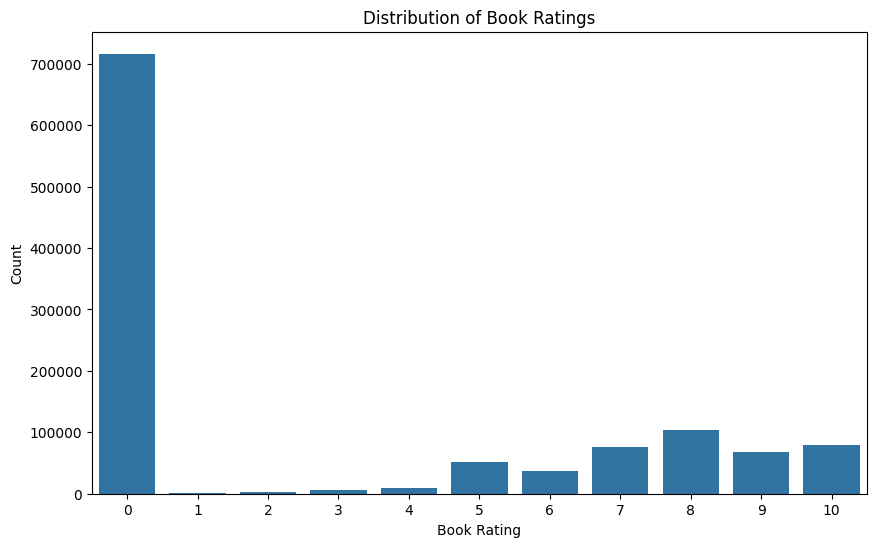

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Book-Rating', data=rating_df)
plt.title('Distribution of Book Ratings')
plt.xlabel('Book Rating')
plt.ylabel('Count')
plt.show()

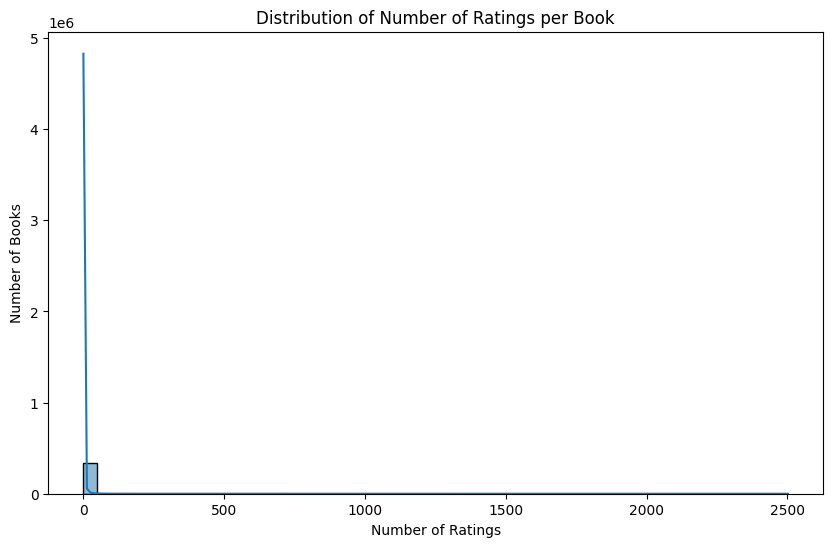

In [14]:
num_ratings_per_book = rating_df['ISBN'].value_counts()

plt.figure(figsize=(10, 6))
sns.histplot(num_ratings_per_book, bins=50, kde=True)
plt.title('Distribution of Number of Ratings per Book')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Books')
plt.show()

In [ ]:
user_ratings_dist = rating_df.groupby('User-ID')['Book-Rating'].mean()

plt.figure(figsize=(10, 6))
sns.histplot(user_ratings_dist, bins=10, kde=True)
plt.title('Distribution of Average User Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Number of Users')
plt.show()

In [ ]:
rating_df.info()

In [ ]:
rating_df.describe()

## Preprocess for Machine Learning

In [ ]:
book_df = book_df.drop(['Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1)

In [ ]:
book_df

In [ ]:
book_df.shape

In [ ]:
#book_df_rows = book_df[book_df.duplicated()]
duplicates = book_df.duplicated(subset=['Book-Title'])

In [ ]:
duplicate_rows = book_df[duplicates]

In [ ]:
duplicate_rows.shape

In [ ]:
book_df = book_df.drop_duplicates(subset=['Book-Title'])

In [ ]:
book_df.shape

In [ ]:
ratings = rating_df['User-ID'].value_counts()

In [ ]:
ratings.sort_values(ascending=False).head()

### Filter users with less than 200 ratings

In [ ]:
len(ratings[ratings < 200])

In [ ]:
rating_df['User-ID'].isin(ratings[ratings < 200].index).sum()

In [ ]:
filtered_users = ratings[ratings < 200].index

df_ratings_rm = rating_df[~rating_df['User-ID'].isin(filtered_users)]

df_ratings_rm.shape

### Filter books with less than 100 ratings

In [ ]:
ratings = rating_df['ISBN'].value_counts() 
ratings.sort_values(ascending=False).head()

In [ ]:
len(ratings[ratings < 100])

In [ ]:
book_df['ISBN'].isin(ratings[ratings < 100].index).sum()

In [ ]:
filtered_isbns = ratings[ratings < 100].index

df_ratings_rm = df_ratings_rm[~df_ratings_rm['ISBN'].isin(filtered_isbns)]

df_ratings_rm.shape

In [ ]:
df_ratings_rm.head()

In [ ]:
book_df.head()

In [ ]:
df = df_ratings_rm.pivot_table(index=['User-ID'],columns=['ISBN'],values='Book-Rating').fillna(0).T
df.head()

In [ ]:
df.index = df.join(book_df.set_index('ISBN'))['Book-Title']

In [ ]:
df = df.sort_index()
df.head()

In [ ]:
df.loc["I'll Be Seeing You"][:5]

In [ ]:
df.to_csv('preprocessed_book_data.csv', index=True)

### Create KNN Model

In [ ]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

In [ ]:
model = NearestNeighbors(metric='cosine')
model.fit(df.values)

### Check Prediction

In [ ]:
title = "I'll Be Seeing You"
df.loc[title].shape

In [ ]:
distance, indice = model.kneighbors([df.loc[title].values], n_neighbors=6)

print(distance)
print(indice)

In [ ]:
pd.DataFrame({
    'title'   : df.iloc[indice[0]].index.values,
    'distance': distance[0]
}) \
.sort_values(by='distance', ascending=False)

In [ ]:
def get_recommends(title=""):
    if title not in df.index:
        print(f"The book '{title}' does not exist in the dataset.")
        return []

    book_vector = df.loc[title].values.reshape(1, -1)

    distances, indices = model.kneighbors(book_vector, n_neighbors=6)

    recommended_books = pd.DataFrame({
        'title': df.index[indices.flatten()][1:],
        'distance': distances.flatten()[1:]  
    })

    recommended_books = recommended_books.sort_values(by='distance', ascending=True)

    return [title, recommended_books.values.tolist()]

In [ ]:
books = get_recommends("I'll Be Seeing You")
print(books)

## Save Model

In [ ]:
import joblib

joblib.dump(model, 'book_recommender_model.joblib')

In [ ]:
loaded_model = joblib.load('book_recommender_model.joblib')

In [ ]:
title = "I'll be Seeing You".strip().lower().replace("'", "")

# Find the index of the matching title (if it exists)
matching_index = df.index.str.strip().str.lower().str.replace("'", "").get_loc(title)

if not pd.isnull(matching_index):
    title = df.index[matching_index]
    book_vector = df.loc[title].values.reshape(1, -1)
    distances, indices = loaded_model.kneighbors(book_vector, n_neighbors=6)

    # Print the recommended books
    recommended_books = df.index[indices.flatten()][1:]  # Exclude the book itself
    print(f"Recommendations for '{title}':")
    for book, distance in zip(recommended_books, distances.flatten()[1:]):
        print(f"{book} (similarity score: {1 - distance:.2f})")
else:
    print(f"Book '{title}' not found in the dataset.")
